In [1]:
%reload_ext autoreload
%autoreload 2
from util import util
from glob import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

Using TensorFlow backend.


In [2]:
macDir = '/Users/etto/Desktop/tpDatasets/'
winDir = 'E:/SAA_DATA/predictiveMaintenance/'
osDir = winDir

train_folder = osDir + 'FEMTOBearingDataSet/Learning_set/'
test_folder = osDir + 'FEMTOBearingDataSet/Test_set/Test_set/'

In [3]:
train_bearings = np.concatenate([['bearing1_{:d}'.format(i) for i in range(1,3)],
                           ['bearing2_{:d}'.format(i) for i in range(1,3)],
                           ['bearing3_{:d}'.format(i) for i in range(1,3)]])
                           
test_bearings = np.concatenate([['bearing1_{:d}'.format(i) for i in range(3,8)],
                                ['bearing2_{:d}'.format(i) for i in range(3,8)],
                                ['bearing3_{:d}'.format(i) for i in range(3,4)]])

# pak alleen de bearings met temperatuur
train_bearings_abbr = ['1_1', '1_2', '2_1', '3_1']
test_bearings_abbr = ['1_4', '1_5', '1_6', '1_7', '2_4', '2_5', '3_3']
train_bearings = ['bearing{:s}'.format(bearing) for bearing in train_bearings_abbr]
test_bearings = ['bearing{:s}'.format(bearing) for bearing in test_bearings_abbr]
                
train_folders = ['{:s}{:s}/'.format(train_folder, bearing) for bearing in train_bearings]
test_folders = ['{:s}{:s}/'.format(test_folder, bearing) for bearing in test_bearings]

In [15]:
def constructTimeSignalWithTimestamp(bearing_folder):
    signal = []
    timestamps = []
    fileformat = 'temp_{:05d}.csv'
    column_names = ['hour', 'minute', 'second', 'dsec', 'temp']
    nrFiles = len(glob(bearing_folder + 'temp*csv'))
    print(bearing_folder + ': {:d} files'.format(nrFiles))
    
    for nr in range(1, nrFiles+1):
        filename = bearing_folder + fileformat.format(nr)
        csvContents = pd.read_csv(filename,names=column_names, sep=';|,', engine='python')
        nwtimestamps = [datetime.time(hour=hr, minute=mn, second=sc) 
                        for (hr,mn,sc) in zip(csvContents['hour'],csvContents['minute'], csvContents['second'])]
        signal = np.append(signal, np.array(csvContents['temp']))
        timestamps = np.append(timestamps, nwtimestamps)
    return timestamps, signal

E:/SAA_DATA/predictiveMaintenance/FEMTOBearingDataSet/Learning_set/bearing1_1/: 466 files


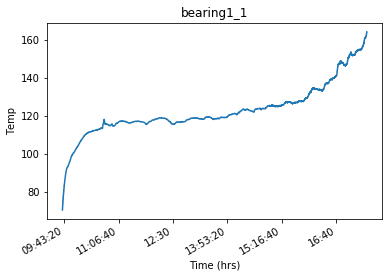

E:/SAA_DATA/predictiveMaintenance/FEMTOBearingDataSet/Learning_set/bearing1_2/: 144 files


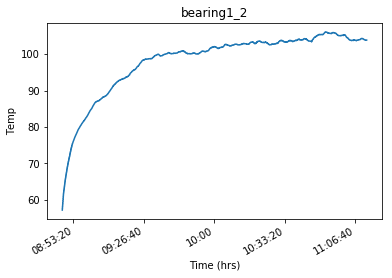

E:/SAA_DATA/predictiveMaintenance/FEMTOBearingDataSet/Learning_set/bearing2_1/: 151 files


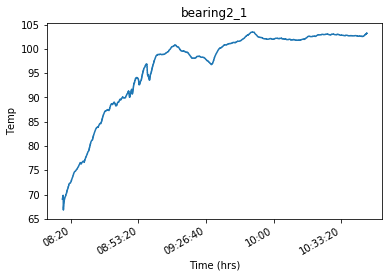

E:/SAA_DATA/predictiveMaintenance/FEMTOBearingDataSet/Learning_set/bearing3_1/: 89 files


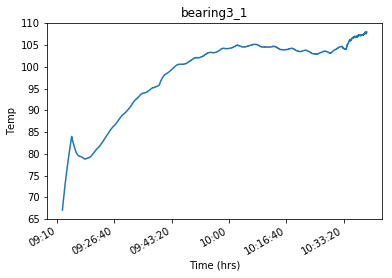

E:/SAA_DATA/predictiveMaintenance/FEMTOBearingDataSet/Test_set/Test_set/bearing1_4/: 188 files


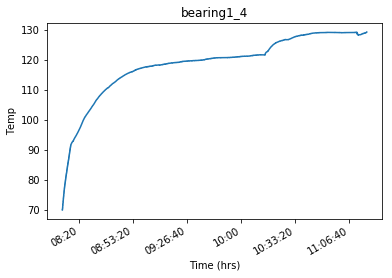

E:/SAA_DATA/predictiveMaintenance/FEMTOBearingDataSet/Test_set/Test_set/bearing1_5/: 383 files


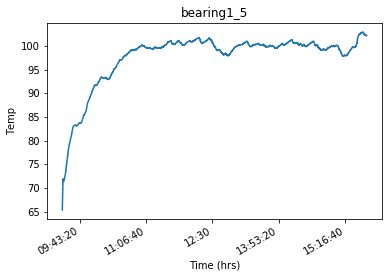

E:/SAA_DATA/predictiveMaintenance/FEMTOBearingDataSet/Test_set/Test_set/bearing1_6/: 383 files


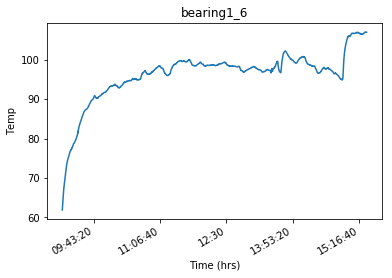

E:/SAA_DATA/predictiveMaintenance/FEMTOBearingDataSet/Test_set/Test_set/bearing1_7/: 250 files


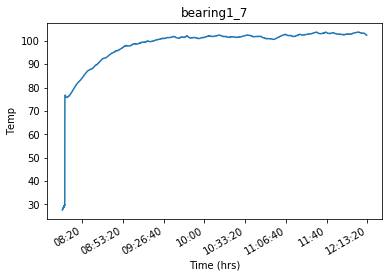

E:/SAA_DATA/predictiveMaintenance/FEMTOBearingDataSet/Test_set/Test_set/bearing2_4/: 101 files


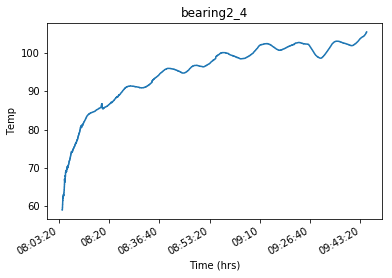

E:/SAA_DATA/predictiveMaintenance/FEMTOBearingDataSet/Test_set/Test_set/bearing2_5/: 335 files


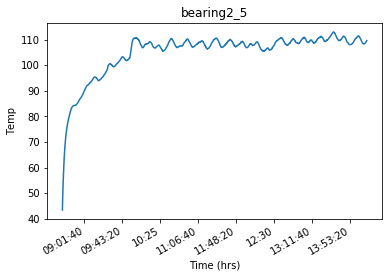

E:/SAA_DATA/predictiveMaintenance/FEMTOBearingDataSet/Test_set/Test_set/bearing3_3/: 58 files


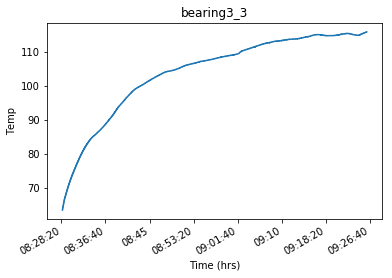

In [17]:
for fld in train_folders:
    times, signal = constructTimeSignalWithTimestamp(fld)
    fig = plt.figure()
    plt.title(fld.split('/')[-2])
    plt.plot(times, signal)
    plt.gcf().autofmt_xdate()
    plt.xlabel('Time (hrs)')
    plt.ylabel('Temp')
    plt.show()

for fld in test_folders:
    times, signal = constructTimeSignalWithTimestamp(fld)
    fig = plt.figure()
    plt.title(fld.split('/')[-2])
    plt.plot(times, signal)
    plt.gcf().autofmt_xdate()
    plt.xlabel('Time (hrs)')
    plt.ylabel('Temp')
    plt.show()

# log
wellicht is de echte tijd voor het plotje niet van belang. Wel van belang bij correleren